In [1]:
import os
import zipfile
import random
import shutil
import scipy
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [2]:
source_path = 'C:\\FILE FIRMAN\\Indonesian Food Image\\\Original'

source_path_bakso = os.path.join(source_path, 'bakso')
source_path_bebek_betutu = os.path.join(source_path, 'bebek_betutu')
source_path_gado_gado = os.path.join(source_path, 'gado_gado')
source_path_gudeg = os.path.join(source_path, 'gudeg')
source_path_nasi_goreng = os.path.join(source_path, 'nasi_goreng')
source_path_pempek = os.path.join(source_path, 'pempek')
source_path_rawon = os.path.join(source_path, 'rawon')
source_path_rendang = os.path.join(source_path, 'rendang')
source_path_sate = os.path.join(source_path, 'sate')
source_path_soto = os.path.join(source_path, 'soto')

In [3]:
print(f"There are {len(os.listdir(source_path_bakso))} images of bakso.")
print(f"There are {len(os.listdir(source_path_bebek_betutu))} images of bebek betutu.")
print(f"There are {len(os.listdir(source_path_gado_gado))} images of gado-gado.")
print(f"There are {len(os.listdir(source_path_gudeg))} images of gudeg.")
print(f"There are {len(os.listdir(source_path_nasi_goreng))} images of nasi goreng.")
print(f"There are {len(os.listdir(source_path_pempek))} images of pempek.")
print(f"There are {len(os.listdir(source_path_rawon))} images of rawon.")
print(f"There are {len(os.listdir(source_path_rendang))} images of rendang.")
print(f"There are {len(os.listdir(source_path_sate))} images of sate.")
print(f"There are {len(os.listdir(source_path_soto))} images of soto.")

There are 452 images of bakso.
There are 515 images of bebek betutu.
There are 383 images of gado-gado.
There are 510 images of gudeg.
There are 573 images of nasi goreng.
There are 555 images of pempek.
There are 437 images of rawon.
There are 339 images of rendang.
There are 532 images of sate.
There are 723 images of soto.


In [4]:
root_dir = 'C:\\FILE FIRMAN\\Indonesian Food Image\\Clean_Data'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_test_dirs(root_path):
  os.makedirs(os.path.join(root_path, 'train'))
  os.makedirs(os.path.join(f'{root_path}/train', 'bakso'))
  os.makedirs(os.path.join(f'{root_path}/train', 'bebek_betutu'))
  os.makedirs(os.path.join(f'{root_path}/train', 'gado_gado'))
  os.makedirs(os.path.join(f'{root_path}/train', 'gudeg'))
  os.makedirs(os.path.join(f'{root_path}/train', 'nasi_goreng'))
  os.makedirs(os.path.join(f'{root_path}/train', 'pempek'))
  os.makedirs(os.path.join(f'{root_path}/train', 'rawon'))
  os.makedirs(os.path.join(f'{root_path}/train', 'rendang'))
  os.makedirs(os.path.join(f'{root_path}/train', 'sate'))
  os.makedirs(os.path.join(f'{root_path}/train', 'soto'))
  os.makedirs(os.path.join(root_path, 'test'))
  os.makedirs(os.path.join(f'{root_path}/test', 'bakso'))
  os.makedirs(os.path.join(f'{root_path}/test', 'bebek_betutu'))
  os.makedirs(os.path.join(f'{root_path}/test', 'gado_gado'))
  os.makedirs(os.path.join(f'{root_path}/test', 'gudeg'))
  os.makedirs(os.path.join(f'{root_path}/test', 'nasi_goreng'))
  os.makedirs(os.path.join(f'{root_path}/test', 'pempek'))
  os.makedirs(os.path.join(f'{root_path}/test', 'rawon'))
  os.makedirs(os.path.join(f'{root_path}/test', 'rendang'))
  os.makedirs(os.path.join(f'{root_path}/test', 'sate'))
  os.makedirs(os.path.join(f'{root_path}/test', 'soto'))

try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [5]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

C:\FILE FIRMAN\Indonesian Food Image\Clean_Data\test
C:\FILE FIRMAN\Indonesian Food Image\Clean_Data\train
C:\FILE FIRMAN\Indonesian Food Image\Clean_Data\test\bakso
C:\FILE FIRMAN\Indonesian Food Image\Clean_Data\test\bebek_betutu
C:\FILE FIRMAN\Indonesian Food Image\Clean_Data\test\gado_gado
C:\FILE FIRMAN\Indonesian Food Image\Clean_Data\test\gudeg
C:\FILE FIRMAN\Indonesian Food Image\Clean_Data\test\nasi_goreng
C:\FILE FIRMAN\Indonesian Food Image\Clean_Data\test\pempek
C:\FILE FIRMAN\Indonesian Food Image\Clean_Data\test\rawon
C:\FILE FIRMAN\Indonesian Food Image\Clean_Data\test\rendang
C:\FILE FIRMAN\Indonesian Food Image\Clean_Data\test\sate
C:\FILE FIRMAN\Indonesian Food Image\Clean_Data\test\soto
C:\FILE FIRMAN\Indonesian Food Image\Clean_Data\train\bakso
C:\FILE FIRMAN\Indonesian Food Image\Clean_Data\train\bebek_betutu
C:\FILE FIRMAN\Indonesian Food Image\Clean_Data\train\gado_gado
C:\FILE FIRMAN\Indonesian Food Image\Clean_Data\train\gudeg
C:\FILE FIRMAN\Indonesian Food Ima

In [6]:
def split_data(SOURCE, TRAIN, TEST, SPLIT_SIZE):

  shuffled_source = random.sample(os.listdir(SOURCE), len(os.listdir(SOURCE)))

  train_number = int(len(shuffled_source) * SPLIT_SIZE)

  i = 0
  target = TRAIN

  for item in shuffled_source:
    item_source = os.path.join(SOURCE, item)
    if os.path.getsize(item_source) == 0:
      print(f'{item} is zero length, so ignoring.')
    else: 
      copyfile(item_source, os.path.join(target, item))
      i += 1

    if i == train_number:
      target = TEST


In [7]:
BAKSO_SOURCE_DIR = "C:\\Users\\Firman Satria S\\Downloads\\Compressed\\Indonesian Food Image\\Indonesian Food Image\\Original\\bakso"
BEBEK_BETUTU_SOURCE_DIR = "C:\\Users\\Firman Satria S\\Downloads\\Compressed\\Indonesian Food Image\\Indonesian Food Image\\Original\\bebek_betutu"
GADO_GADO_SOURCE_DIR = "C:\\Users\\Firman Satria S\\Downloads\\Compressed\\Indonesian Food Image\\Indonesian Food Image\\Original\\gado_gado"
GUDEG_SOURCE_DIR = "C:\\Users\\Firman Satria S\\Downloads\\Compressed\\Indonesian Food Image\\Indonesian Food Image\\Original\\gudeg"
NASI_GORENG_SOURCE_DIR = "C:\\Users\\Firman Satria S\\Downloads\\Compressed\\Indonesian Food Image\\Indonesian Food Image\\Original\\nasi_goreng"
PEMPEK_SOURCE_DIR = "C:\\Users\\Firman Satria S\\Downloads\\Compressed\\Indonesian Food Image\\Indonesian Food Image\\Original\\pempek"
RAWON_SOURCE_DIR = "C:\\Users\\Firman Satria S\\Downloads\\Compressed\\Indonesian Food Image\\Indonesian Food Image\\Original\\rawon"
RENDANG_SOURCE_DIR = "C:\\Users\\Firman Satria S\\Downloads\\Compressed\\Indonesian Food Image\\Indonesian Food Image\\Original\\rendang"
SATE_SOURCE_DIR = "C:\\Users\\Firman Satria S\\Downloads\\Compressed\\Indonesian Food Image\\Indonesian Food Image\\Original\\sate"
SOTO_SOURCE_DIR = "C:\\Users\\Firman Satria S\\Downloads\\Compressed\\Indonesian Food Image\\Indonesian Food Image\\Original\\soto"


TRAIN_DIR = "C:\\Users\\Firman Satria S\\Downloads\\Compressed\\Indonesian Food Image\\Indonesian Food Image\\Clean_Data\\train"
TEST_DIR = "C:\\Users\\Firman Satria S\\Downloads\\Compressed\\Indonesian Food Image\\Indonesian Food Image\\Clean_Data\\test"

TRAIN_BAKSO_DIR = os.path.join(TRAIN_DIR, "bakso/")
TEST_BAKSO_DIR = os.path.join(TEST_DIR, "bakso/")

TRAIN_BEBEK_BETUTU_DIR = os.path.join(TRAIN_DIR, "bebek_betutu/")
TEST_BEBEK_BETUTU_DIR = os.path.join(TEST_DIR, "bebek_betutu/")

TRAIN_GADO_GADO_DIR = os.path.join(TRAIN_DIR, "gado_gado/")
TEST_GADO_GADO_DIR = os.path.join(TEST_DIR, "gado_gado/")

TRAIN_GUDEG_DIR = os.path.join(TRAIN_DIR, "gudeg/")
TEST_GUDEG_DIR = os.path.join(TEST_DIR, "gudeg/")

TRAIN_NASI_GORENG_DIR = os.path.join(TRAIN_DIR, "nasi_goreng/")
TEST_NASI_GORENG_DIR = os.path.join(TEST_DIR, "nasi_goreng/")

TRAIN_PEMPEK_DIR = os.path.join(TRAIN_DIR, "pempek/")
TEST_PEMPEK_DIR = os.path.join(TEST_DIR, "pempek/")

TRAIN_RAWON_DIR = os.path.join(TRAIN_DIR, "rawon/")
TEST_RAWON_DIR = os.path.join(TEST_DIR, "rawon/")

TRAIN_RENDANG_DIR = os.path.join(TRAIN_DIR, "rendang/")
TEST_RENDANG_DIR = os.path.join(TEST_DIR, "rendang/")

TRAIN_SATE_DIR = os.path.join(TRAIN_DIR, "sate/")
TEST_SATE_DIR = os.path.join(TEST_DIR, "sate/")

TRAIN_SOTO_DIR = os.path.join(TRAIN_DIR, "soto/")
TEST_SOTO_DIR = os.path.join(TEST_DIR, "soto/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAIN_BAKSO_DIR)) > 0:
  for file in os.scandir(TRAIN_BAKSO_DIR):
    os.remove(file.path)
if len(os.listdir(TRAIN_BEBEK_BETUTU_DIR)) > 0:
  for file in os.scandir(TRAIN_BEBEK_BETUTU_DIR):
    os.remove(file.path)
if len(os.listdir(TRAIN_GADO_GADO_DIR)) > 0:
  for file in os.scandir(TRAIN_GADO_GADO_DIR):
    os.remove(file.path)
if len(os.listdir(TRAIN_GUDEG_DIR)) > 0:
  for file in os.scandir(TRAIN_GUDEG_DIR):
    os.remove(file.path)
if len(os.listdir(TRAIN_NASI_GORENG_DIR)) > 0:
  for file in os.scandir(TRAIN_NASI_GORENG_DIR):
    os.remove(file.path)
if len(os.listdir(TRAIN_PEMPEK_DIR)) > 0:
  for file in os.scandir(TRAIN_PEMPEK_DIR):
    os.remove(file.path)
if len(os.listdir(TRAIN_RAWON_DIR)) > 0:
  for file in os.scandir(TRAIN_RAWON_DIR):
    os.remove(file.path)
if len(os.listdir(TRAIN_RENDANG_DIR)) > 0:
  for file in os.scandir(TRAIN_RENDANG_DIR):
    os.remove(file.path)
if len(os.listdir(TRAIN_SATE_DIR)) > 0:
  for file in os.scandir(TRAIN_SATE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAIN_SOTO_DIR)) > 0:
  for file in os.scandir(TRAIN_SOTO_DIR):
    os.remove(file.path)


if len(os.listdir(TEST_BAKSO_DIR)) > 0:
  for file in os.scandir(TEST_BAKSO_DIR):
    os.remove(file.path)
if len(os.listdir(TEST_BEBEK_BETUTU_DIR)) > 0:
  for file in os.scandir(TEST_BEBEK_BETUTU_DIR):
    os.remove(file.path)
if len(os.listdir(TEST_GADO_GADO_DIR)) > 0:
  for file in os.scandir(TEST_GADO_GADO_DIR):
    os.remove(file.path)
if len(os.listdir(TEST_GUDEG_DIR)) > 0:
  for file in os.scandir(TEST_GUDEG_DIR):
    os.remove(file.path)
if len(os.listdir(TEST_NASI_GORENG_DIR)) > 0:
  for file in os.scandir(TEST_NASI_GORENG_DIR):
    os.remove(file.path)
if len(os.listdir(TEST_PEMPEK_DIR)) > 0:
  for file in os.scandir(TEST_PEMPEK_DIR):
    os.remove(file.path)
if len(os.listdir(TEST_RAWON_DIR)) > 0:
  for file in os.scandir(TEST_RAWON_DIR):
    os.remove(file.path)
if len(os.listdir(TEST_RENDANG_DIR)) > 0:
  for file in os.scandir(TEST_RENDANG_DIR):
    os.remove(file.path)
if len(os.listdir(TEST_SATE_DIR)) > 0:
  for file in os.scandir(TEST_SATE_DIR):
    os.remove(file.path)
if len(os.listdir(TEST_SOTO_DIR)) > 0:
  for file in os.scandir(TEST_SOTO_DIR):
    os.remove(file.path)

split_size = .9

split_data(BAKSO_SOURCE_DIR, TRAIN_BAKSO_DIR, TEST_BAKSO_DIR, split_size)
split_data(BEBEK_BETUTU_SOURCE_DIR, TRAIN_BEBEK_BETUTU_DIR, TEST_BEBEK_BETUTU_DIR, split_size)
split_data(GADO_GADO_SOURCE_DIR, TRAIN_GADO_GADO_DIR, TEST_GADO_GADO_DIR, split_size)
split_data(GUDEG_SOURCE_DIR, TRAIN_GUDEG_DIR, TEST_GUDEG_DIR, split_size)
split_data(NASI_GORENG_SOURCE_DIR, TRAIN_NASI_GORENG_DIR, TEST_NASI_GORENG_DIR, split_size)
split_data(PEMPEK_SOURCE_DIR, TRAIN_PEMPEK_DIR, TEST_PEMPEK_DIR, split_size)
split_data(RAWON_SOURCE_DIR, TRAIN_RAWON_DIR, TEST_RAWON_DIR, split_size)
split_data(RENDANG_SOURCE_DIR, TRAIN_RENDANG_DIR, TEST_RENDANG_DIR, split_size)
split_data(SATE_SOURCE_DIR, TRAIN_SATE_DIR, TEST_SATE_DIR, split_size)
split_data(SOTO_SOURCE_DIR, TRAIN_SOTO_DIR, TEST_SOTO_DIR, split_size)

print(f"\n\nThere are {len(os.listdir(TRAIN_BAKSO_DIR))} images of cats for train")
print(f"There are {len(os.listdir(TRAIN_BEBEK_BETUTU_DIR))} images of dogs for train")
print(f"There are {len(os.listdir(TRAIN_GADO_GADO_DIR))} images of dogs for train")
print(f"There are {len(os.listdir(TRAIN_GUDEG_DIR))} images of dogs for train")
print(f"There are {len(os.listdir(TRAIN_NASI_GORENG_DIR))} images of dogs for train")
print(f"There are {len(os.listdir(TRAIN_PEMPEK_DIR))} images of dogs for train")
print(f"There are {len(os.listdir(TRAIN_RAWON_DIR))} images of dogs for train")
print(f"There are {len(os.listdir(TRAIN_RENDANG_DIR))} images of dogs for train")
print(f"There are {len(os.listdir(TRAIN_SATE_DIR))} images of dogs for train")
print(f"There are {len(os.listdir(TRAIN_SOTO_DIR))} images of dogs for train")

print(f"There are {len(os.listdir(TEST_BAKSO_DIR))} images of cats for test")
print(f"There are {len(os.listdir(TEST_BEBEK_BETUTU_DIR))} images of dogs for test")
print(f"There are {len(os.listdir(TEST_GADO_GADO_DIR))} images of cats for test")
print(f"There are {len(os.listdir(TEST_GUDEG_DIR))} images of dogs for test")
print(f"There are {len(os.listdir(TEST_NASI_GORENG_DIR))} images of cats for test")
print(f"There are {len(os.listdir(TEST_PEMPEK_DIR))} images of dogs for test")
print(f"There are {len(os.listdir(TEST_RAWON_DIR))} images of cats for test")
print(f"There are {len(os.listdir(TEST_RENDANG_DIR))} images of dogs for test")
print(f"There are {len(os.listdir(TEST_SATE_DIR))} images of cats for test")
print(f"There are {len(os.listdir(TEST_SOTO_DIR))} images of dogs for test")



There are 406 images of cats for train
There are 463 images of dogs for train
There are 344 images of dogs for train
There are 459 images of dogs for train
There are 515 images of dogs for train
There are 499 images of dogs for train
There are 393 images of dogs for train
There are 305 images of dogs for train
There are 478 images of dogs for train
There are 650 images of dogs for train
There are 46 images of cats for test
There are 52 images of dogs for test
There are 39 images of cats for test
There are 51 images of dogs for test
There are 58 images of cats for test
There are 56 images of dogs for test
There are 44 images of cats for test
There are 34 images of dogs for test
There are 54 images of cats for test
There are 73 images of dogs for test


In [8]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  train_datagen = ImageDataGenerator(rescale = 1./255.)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=16,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  validation_datagen = ImageDataGenerator(rescale = 1./255.)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=5,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  return train_generator, validation_generator


In [9]:
train_generator, validation_generator = train_val_generators(TRAIN_DIR, TEST_DIR)

Found 4511 images belonging to 10 classes.
Found 507 images belonging to 10 classes.


In [12]:
def create_model():

  model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(512, activation='relu'), 
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(256, activation='relu'), 
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer='Adam',
                loss='SparseCategoricalCrossEntropy',
                metrics=['accuracy']) 
  
  return model

In [13]:
model = create_model()

history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15


ValueError: in user code:

    File "c:\Users\Firman Satria S\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Firman Satria S\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Firman Satria S\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Firman Satria S\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Firman Satria S\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "c:\Users\Firman Satria S\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 240, in __call__
        self.build(y_pred)
    File "c:\Users\Firman Satria S\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 182, in build
        self._losses = tf.nest.map_structure(
    File "c:\Users\Firman Satria S\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 353, in _get_loss_object
        loss = losses_mod.get(loss)
    File "c:\Users\Firman Satria S\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2929, in get
        return deserialize(identifier, use_legacy_format=use_legacy_format)
    File "c:\Users\Firman Satria S\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2876, in deserialize
        return legacy_serialization.deserialize_keras_object(
    File "c:\Users\Firman Satria S\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\legacy\serialization.py", line 537, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: 'SparseCategoricalCrossEntropy'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


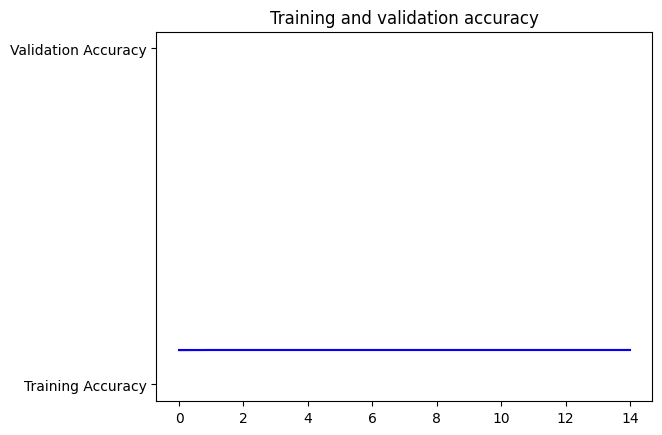

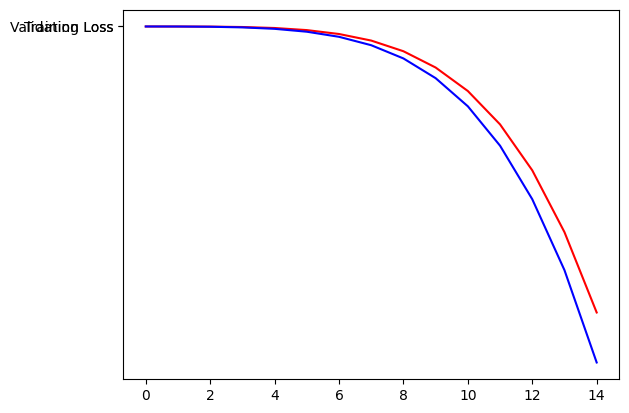

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()
